# Simulated annealing - Binary image
Author: **Jakub Kosmydel**
## Load libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.ndimage import convolve
from scipy.signal import convolve2d
from tqdm import tnrange, tqdm_notebook
from matplotlib.gridspec import GridSpec
from datetime import datetime

np.random.seed(1337)

### Annealing result

In [2]:
class AnnealingData:
    def __init__(self, solution, solution_energy, temp_hist, energy_hist, start_state=None):
        self.solution = solution
        self.solution_energy = solution_energy
        self.temp_hist = temp_hist
        self.energy_hist = energy_hist
        self.start_state = start_state

### Annealing function
The `image_annealing` function takes 5 arguments:
- data - input 2D matrix (binary image),
- initial_temp,
- steps - maximum amount of steps,
- modifier_temp - rate of annealing (should be between 0 and 1, higher means slower rate),
- kernel - 2D matrix with single point energy definition.

In [3]:
def image_annealing(data, initial_temp=1, steps=100, modifier_temp=0.99, kernel=None):
    n = len(data)
    if kernel is None:
        kernel = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])
        
    def neighbour(state, temp):
        res = state.copy()
        temp = int(temp)

        for x1, y1 in np.random.randint(n, size=(temp, 2)):
            for _ in range(100):
                x2, y2 = np.random.randint(-temp, temp+1, size=(2, 1))
                x2 = (x1 + x2) % n
                y2 = (y1 + y2) % n
                if state[x1, y1] != state[x2, y2]:
                    res[x1, y1], res[x2, y2] = res[x2, y2], res[x1, y1]
                    break

        return res

    def energy(state):
        c = convolve2d(state,
            kernel,
            mode='same',
            boundary='wrap')
        return np.sum(np.multiply(c, state))
    
    def P(E, E1, T):
        if E1 < E: return 1.
        return np.exp(-(E1-E)/T)
    
    s = data.copy()
    start_energy = energy(s)
    min_energy = float('inf')
    min_energy_s = s

    space_x = []
    energy_y = []
    temp_y = []

    T = initial_temp

    for k in tnrange(steps):

        T *= modifier_temp
        s_new = neighbour(s, T)
        e = energy(s)
        e1 = energy(s_new)

        space_x.append(k)
        energy_y.append(e)
        temp_y.append(T)

        if e1 < min_energy:
            min_energy = e1
            min_energy_s = s_new
            
        if P(e, e1, T) >= np.random.uniform(0, 1):
            s = s_new

    return AnnealingData(solution=min_energy_s, solution_energy=min_energy, temp_hist=temp_y, energy_hist=energy_y, start_state=data)

### Plotting results and saving to file

In [4]:
def plot_binary_img(annealing_data, name="binarymap"):
    fig1 = plt.figure(constrained_layout=True, figsize=(9, 6), dpi=256)
    gs = GridSpec(2, 3, figure=fig1)
    ax1 = fig1.add_subplot(gs[:, :2])
    ax2 = fig1.add_subplot(gs[0, 2])
    ax3 = fig1.add_subplot(gs[1, 2])

    ax1.imshow(annealing_data.solution)

    space_x = [x for x in range(len(annealing_data.energy_hist))]
    ax2.set_ylabel('Energy')
    ax2.scatter(space_x, annealing_data.energy_hist, s=0.05)
    ax3.set_ylabel('Temperature')
    ax3.scatter(space_x, annealing_data.temp_hist, s=0.05)
    now = datetime.now()
    filename = f'binaryimg/{name}-{now.strftime("%d_%m_%Y-%H-%M-%S")}.png'
    print(filename)
    plt.savefig(filename)
    plt.show()

### Generating random images and testing results

In [5]:
def generate_random_image(n, density=0.3):
    return np.random.choice([0, 1], size=(n, n), p=[1-density, density])
    

t1 = generate_random_image(256, 0.1)
t3 = generate_random_image(256, 0.3)
t4 = generate_random_image(256, 0.4)

#### Simple gravity / antigravity

d:\studia\semestr4\mownit\venv\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


  0%|          | 0/120000 [00:00<?, ?it/s]

binaryimg/n4-negative-13_04_2022-08-35-15.png


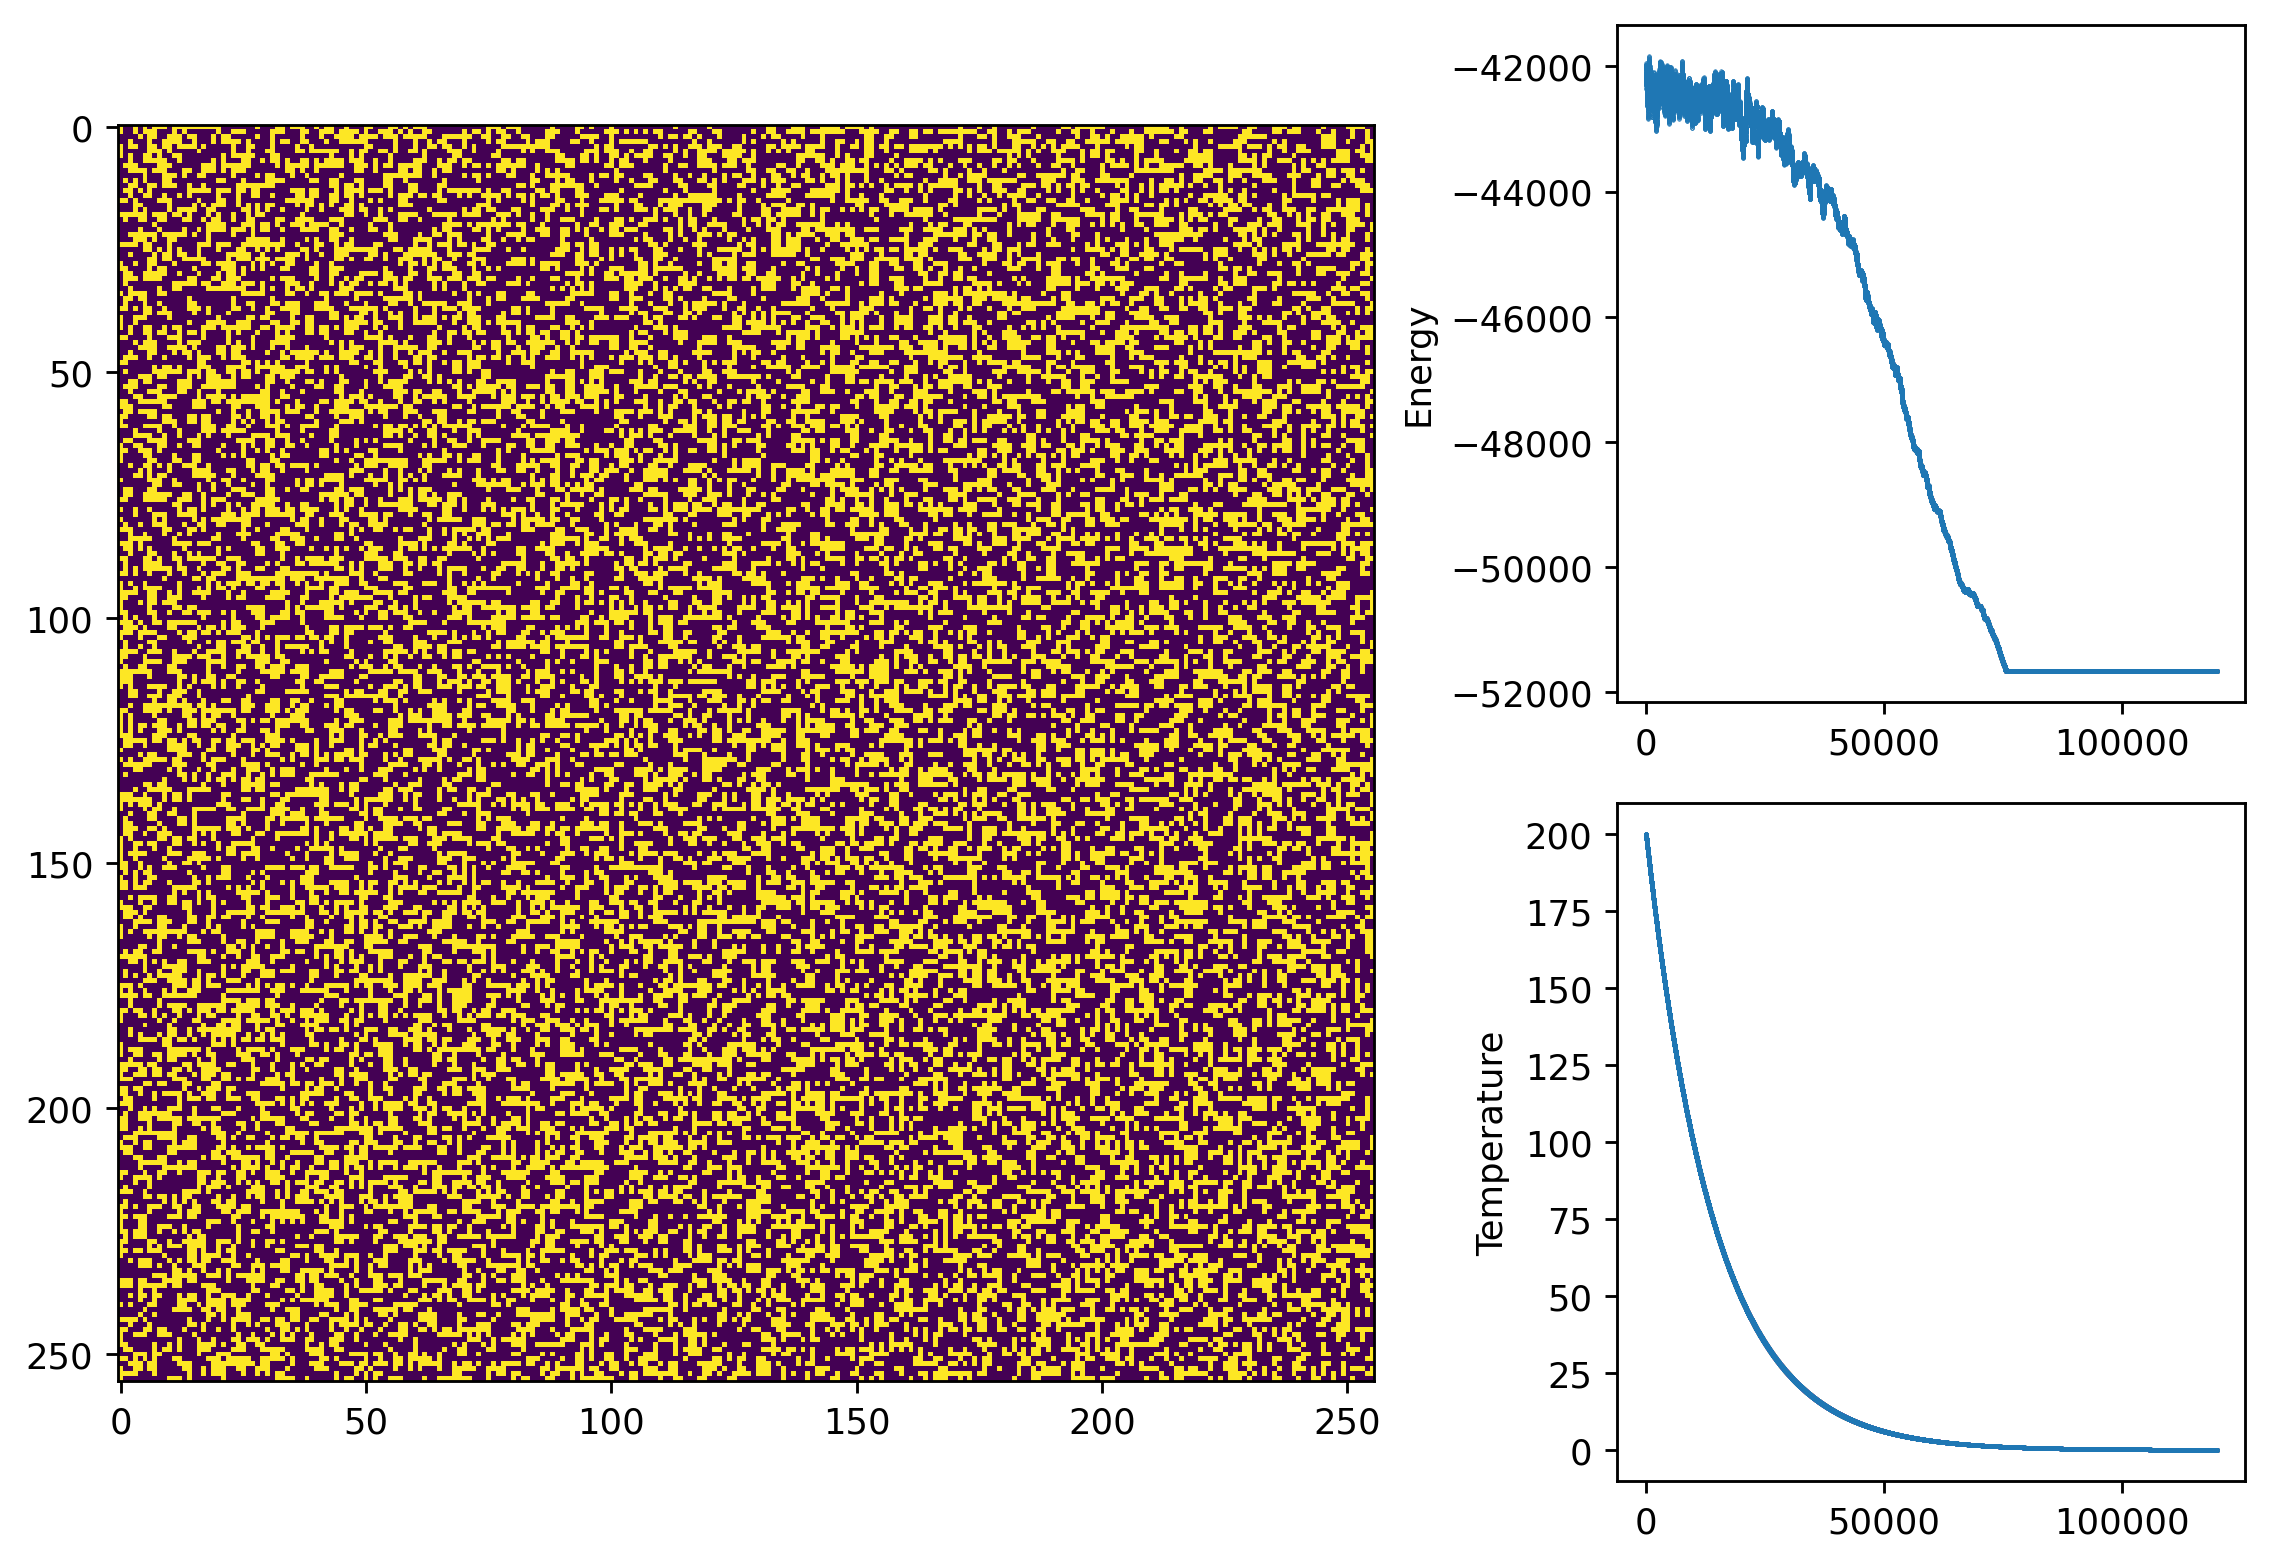

In [6]:
sol1 = image_annealing(t4, 200, 120000, modifier_temp=0.99993, kernel=np.array([[0, -1, 0], [-1, 0, -1], [0, -1, 0]]))

plot_binary_img(sol1, name="n4-negative")

d:\studia\semestr4\mownit\venv\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


  0%|          | 0/120000 [00:00<?, ?it/s]

binaryimg/n4-positive-13_04_2022-08-46-11.png


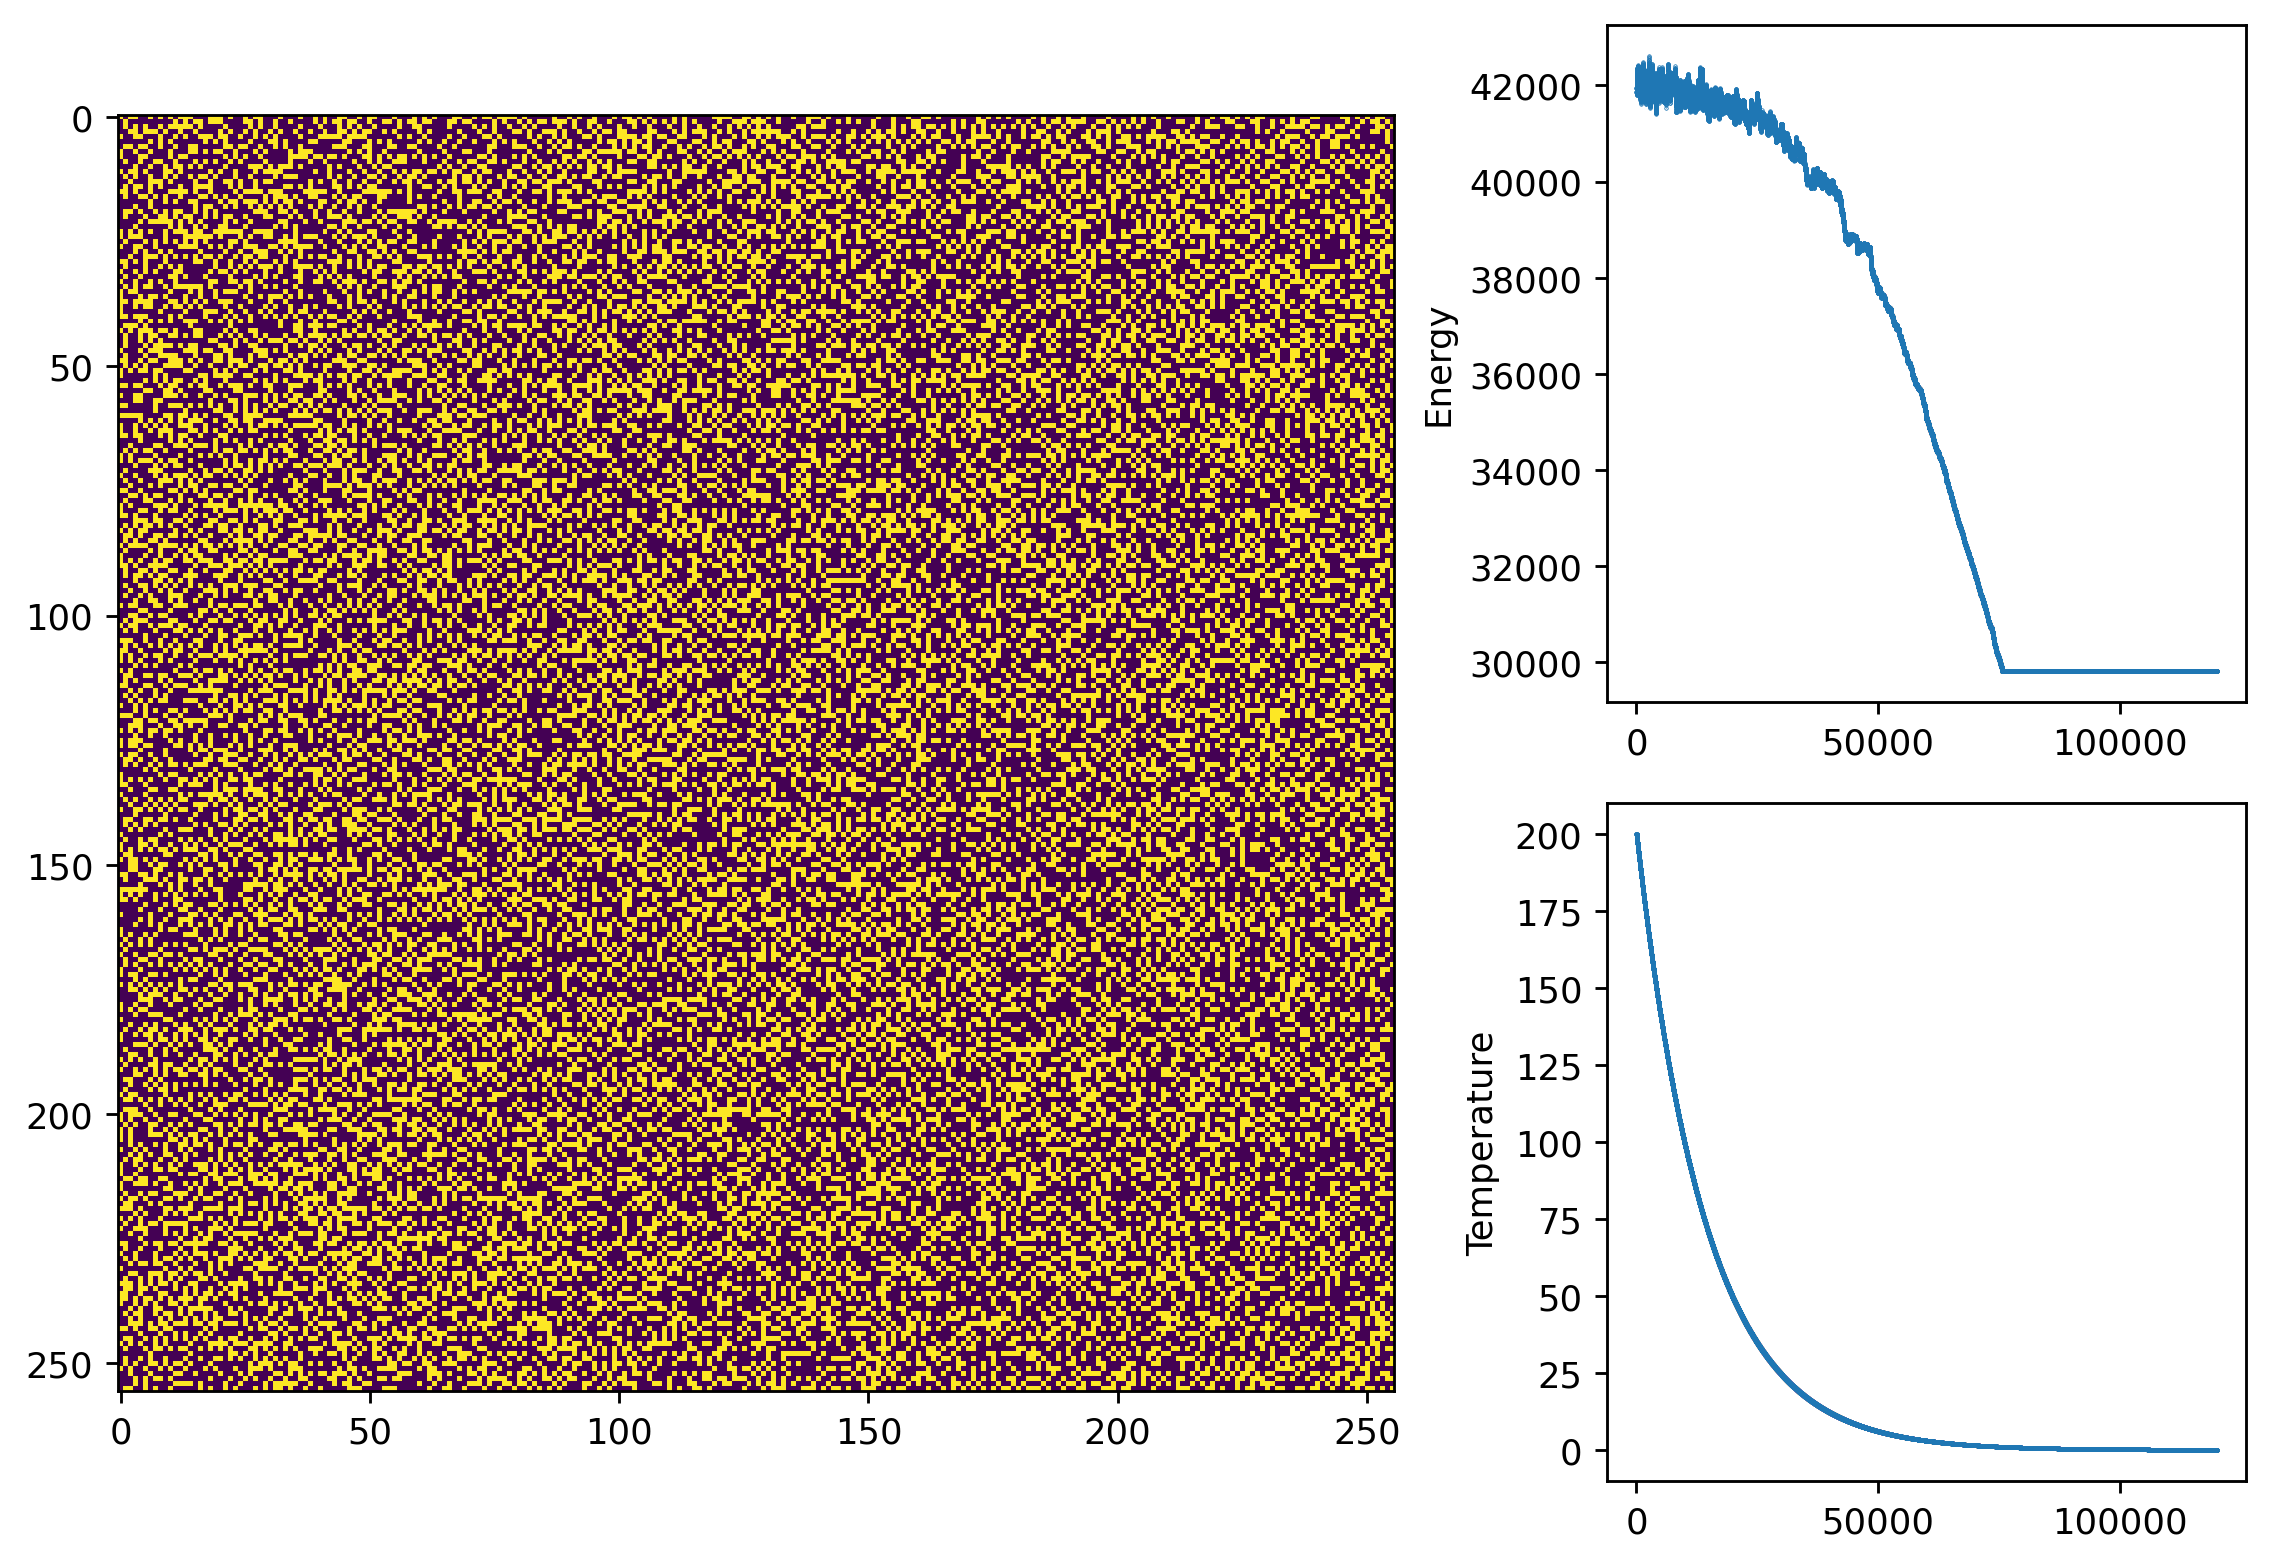

In [7]:
sol2 = image_annealing(t4, 200, 120000, modifier_temp=0.99993, kernel=np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]]))

plot_binary_img(sol2, name="n4-positive")

#### 0.1 / 0.3 / 0.4 - strong gravity

In [8]:
kernel5x5 = -np.array([[1, 1, 1, 1, 1, 1, 1],
                      [1, 2, 2, 2, 2, 2, 1],
                      [1, 2, 4, 4, 4, 1, 1],
                      [1, 2, 4, 0, 4, 2, 1],
                      [1, 2, 4, 4, 4, 2, 1],
                      [1, 2, 2, 2, 2, 2, 1],
                      [1, 1, 1, 1, 1, 1, 1]
                      ])

##### p: 0.1

d:\studia\semestr4\mownit\venv\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


  0%|          | 0/50000 [00:00<?, ?it/s]

binaryimg/5x5_gravity-13_04_2022-09-13-40.png


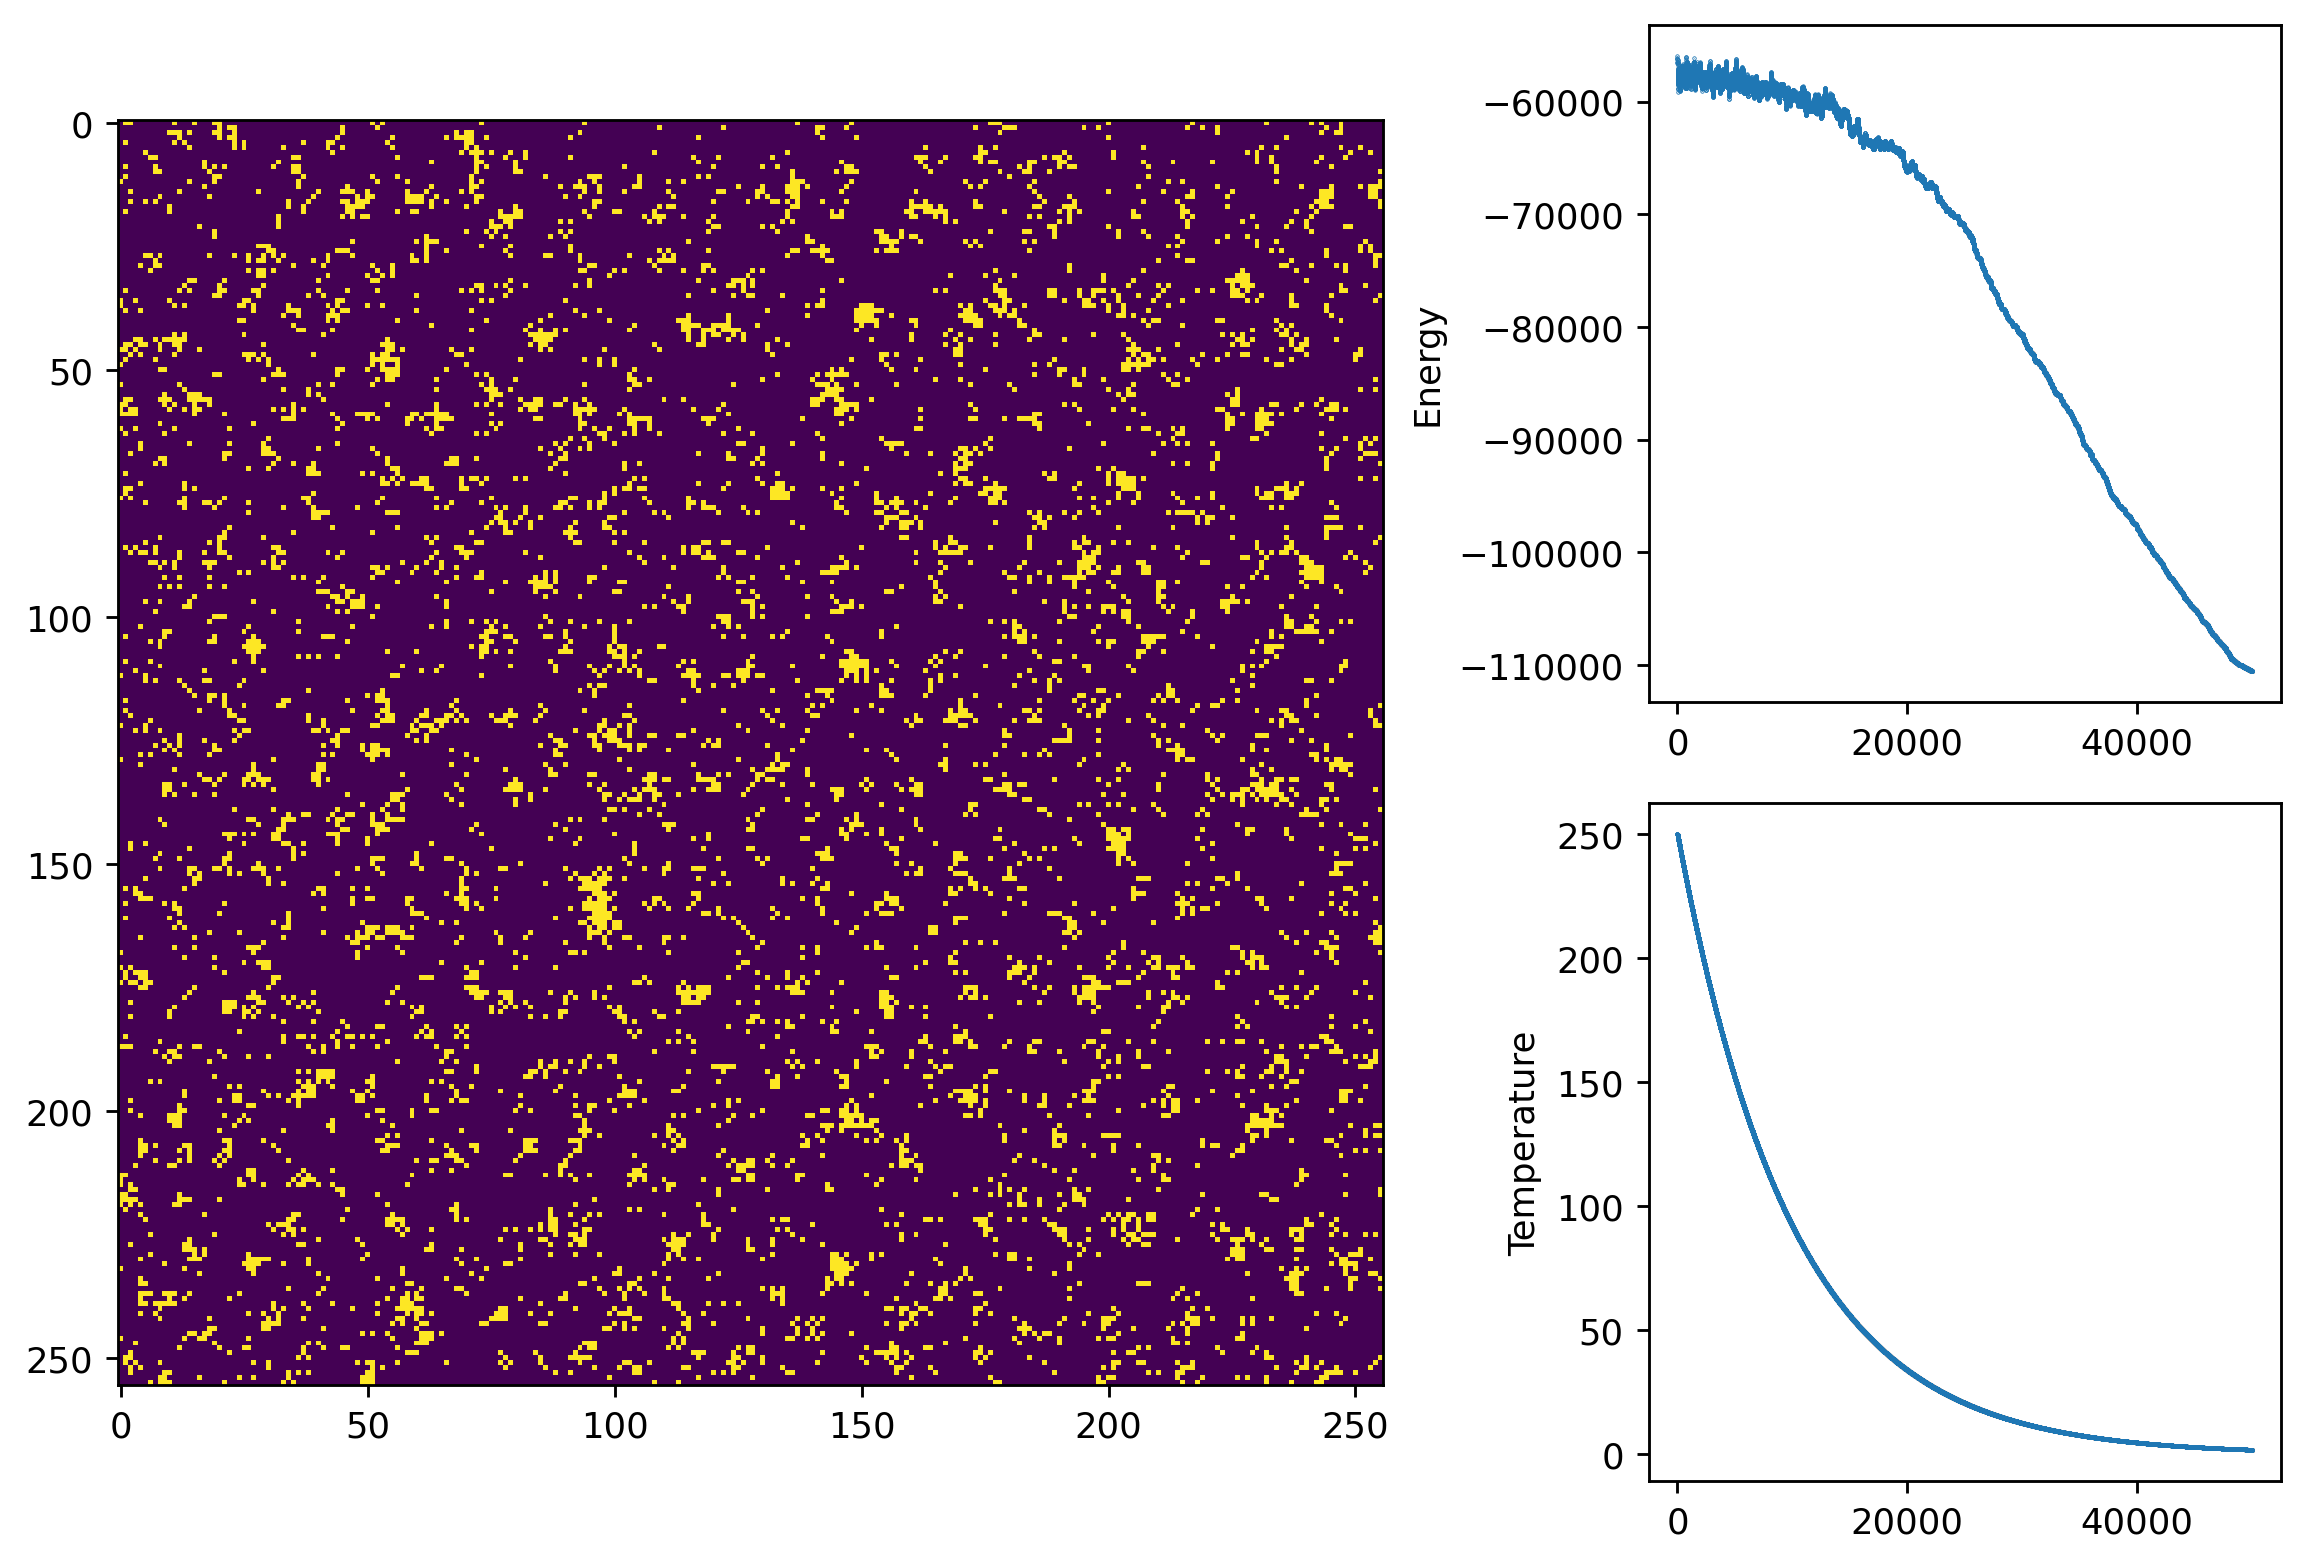

In [10]:
sol_t1 = image_annealing(t1, 250, 50000, modifier_temp=0.9999, kernel=kernel5x5)

In [ ]:
plot_binary_img(sol_t1, name="5x5_gravity")

##### p: 0.3

d:\studia\semestr4\mownit\venv\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


  0%|          | 0/110000 [00:00<?, ?it/s]

binaryimg/5x5_gravity-13_04_2022-09-43-17.png


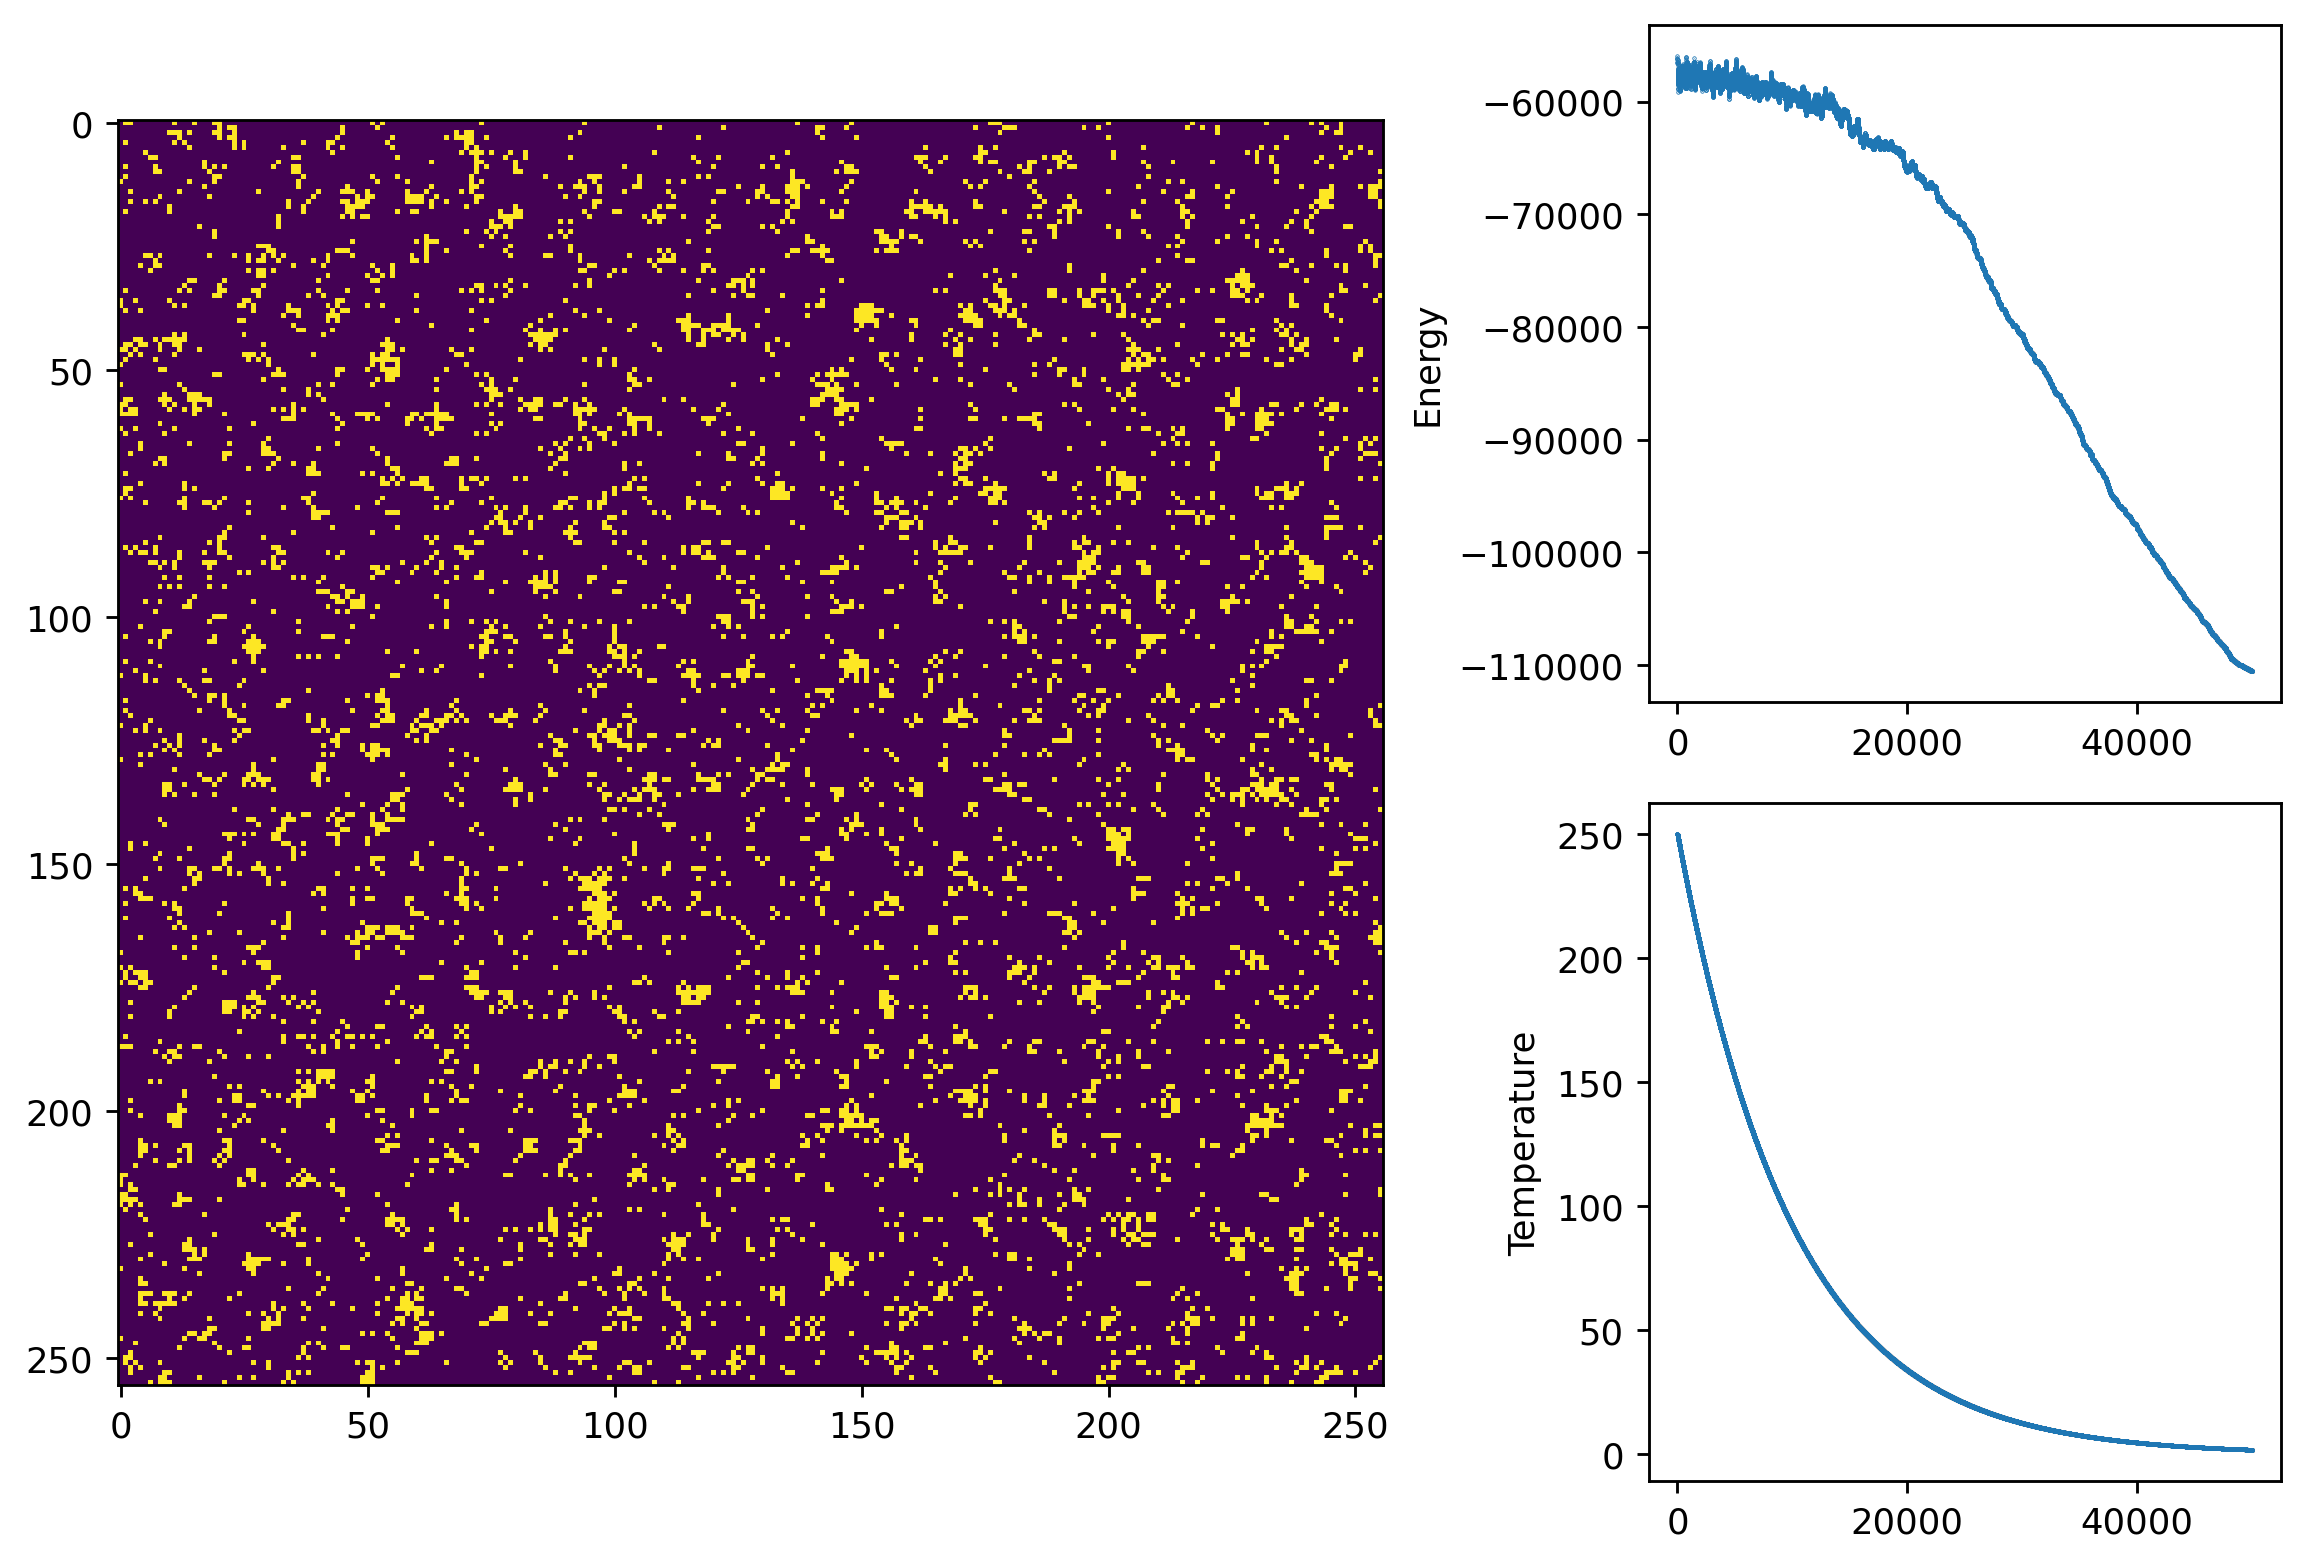

In [11]:
sol_t3 = image_annealing(t3, 250, 110000, modifier_temp=0.9999, kernel=kernel5x5)

binaryimg/5x5_gravity-13_04_2022-12-07-02.png


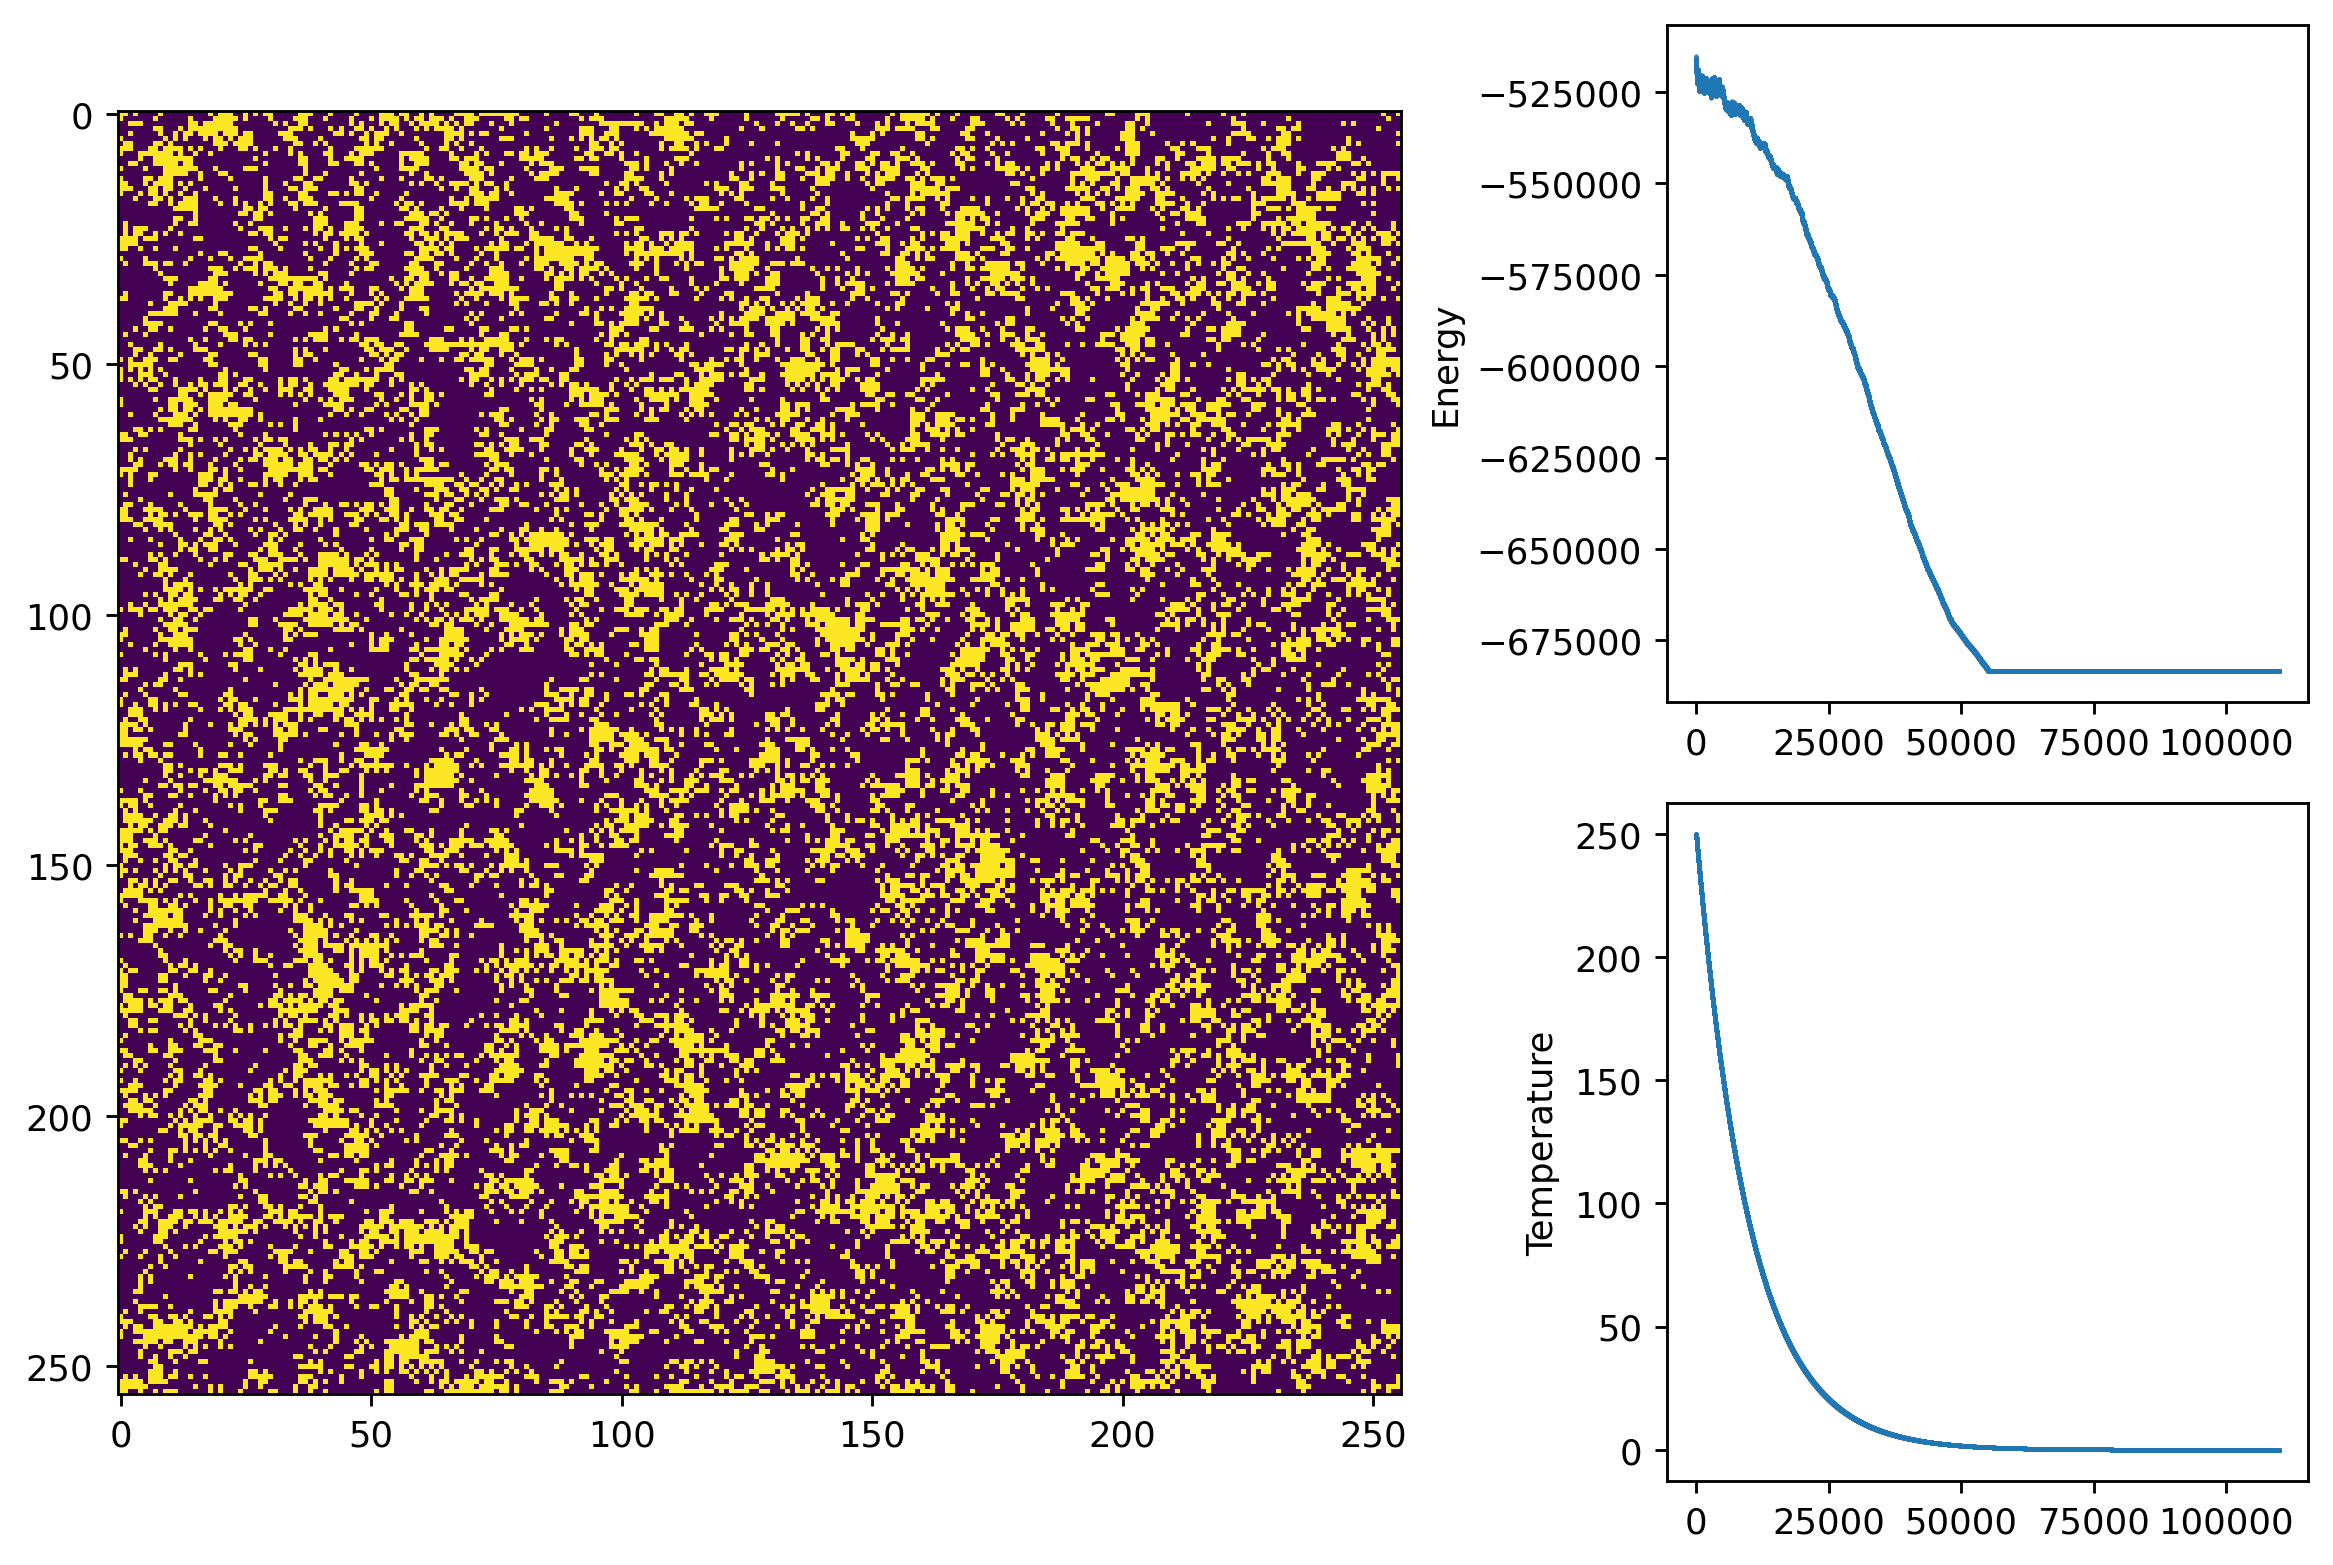

In [13]:
plot_binary_img(sol_t3, name="5x5_gravity")

##### p: 0.4

In [ ]:
sol_t4 = image_annealing(t4, 250, 110000, modifier_temp=0.9999, kernel=kernel5x5)

binaryimg/5x5_gravity-13_04_2022-12-07-21.png


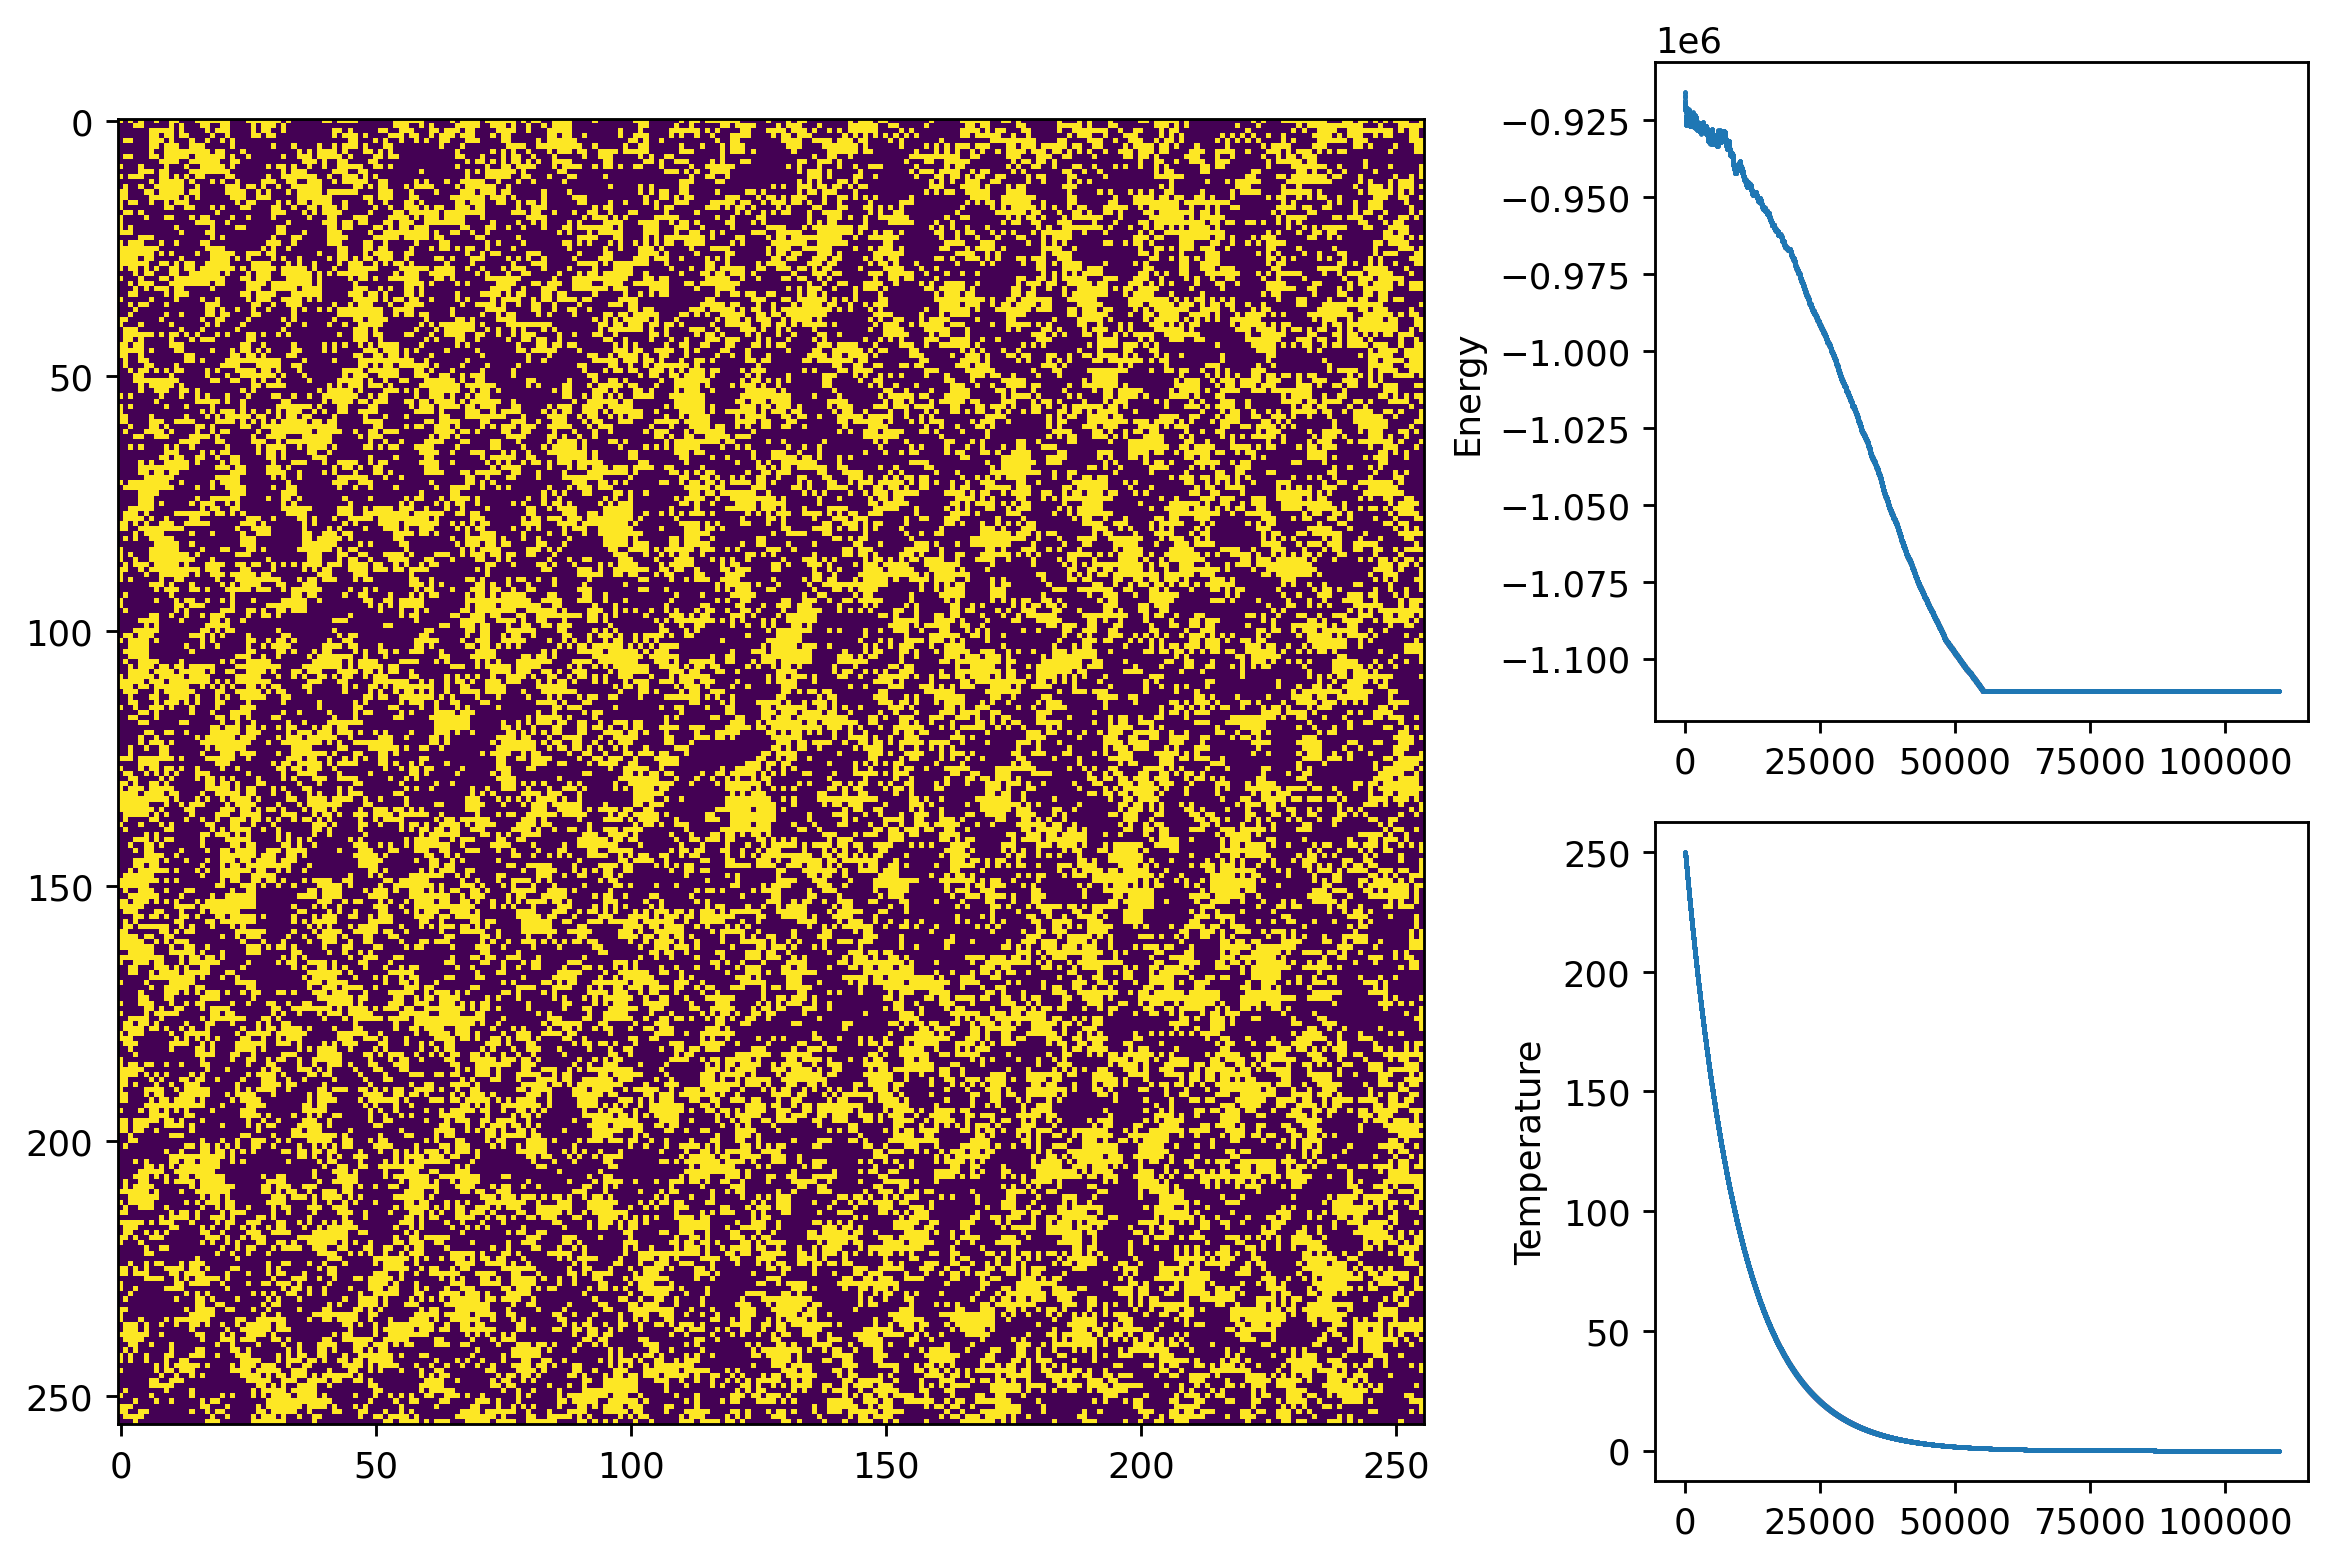

In [15]:
plot_binary_img(sol_t4, name="5x5_gravity")

## Additional information
- More examples are available in `BinaryMap.pdf`